# Assignment 1

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be *Assignment 1* for Visual Analytics, designing a simple *image search* algorithm. The Github classroom repo for this Assignment will go online later.

In [2]:
# loading needed packages
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
import pandas as pd
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

## Pick a random flower from the dataset, load it, and normalize it

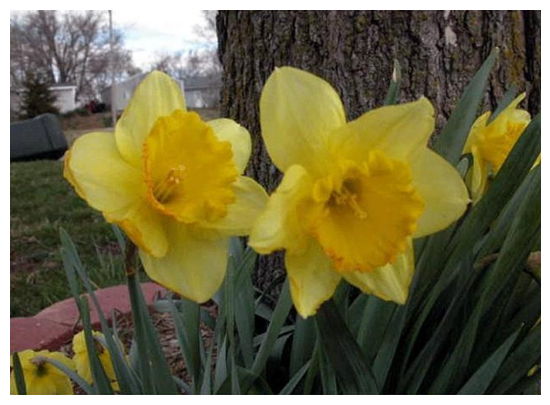

In [4]:
# loading my chosen image (the first one)
# as I am in the "nbs" folder, I am going to folders out to go into the "cds-vis-data" and "flowers" folder
image = cv2.imread(os.path.join("..", "..", "431824", "flowers", "image_0001.jpg")) # for some reason my "cds-vis-data" folder is called "431824" in uCloud
jimshow(image)

In [8]:
# normalizing using MinMax normalization the image to have pixel values within the range 0-1. (UDDYB)
image_norm = cv2.normalize(image, None, 0, 1.0, cv2.NORM_MINMAX)

## Compare that image's colour histogram to every *other* flower in the dataset

In [9]:
# creating the color histogram for my chosen flower (using the normalized image, all three channels, no mask and 0-255 range)

flower_hist = cv2.calcHist([image_norm], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

In [17]:
# lav et for-loop der kører over alle filer i mappen BORTSET fra en fil der har samme navn.

filepath = os.path.join("..", "..", "431824", "flowers") # define filepath to "flowers" folder
distances = []
filenames = []

for file in os.listdir(filepath): # for every file in the filepath
    if file == "image_0001.jpg": # det her kan nok gøres lidt mere rigtigt
        continue
    else:
        #print(file)
        new_path = filepath + f"/{file}" # defining path to the image
        new_im = cv2.imread(new_path) # reading the image
        new_im_norm = cv2.normalize(new_im, None, 0, 1.0, cv2.NORM_MINMAX) # normalizing it
        new_flower_hist = cv2.calcHist([new_im_norm], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
        distance_score = round(cv2.compareHist(flower_hist, new_flower_hist, cv2.HISTCMP_CHISQR), 2)

        distances.append(distance_score)
        filenames.append(file)

In [19]:
dist_series = pd.Series(distances)
name_series = pd.Series(filenames)

data = pd.DataFrame({"filename" : name_series,
                     "distance_score" : dist_series}) # creating a dataframe from these two pandas series using a dictionary

# MAYBE CHECK THAT THEY ARE IN THE RIGHT ORDER?

In [23]:
sorted = data.sort_values('distance_score', ascending = False)

In [24]:
print(sorted)

            filename  distance_score
319   image_0257.jpg    1.322703e+09
114   image_0317.jpg    8.380166e+08
682   image_0555.jpg    7.867964e+08
521   image_0680.jpg    7.218238e+08
1326  image_0191.jpg    7.193102e+08
...              ...             ...
1334  image_0048.jpg    1.610030e+04
110   image_0945.jpg    1.491318e+04
47    image_0567.jpg    1.091538e+04
299   image_0959.jpg    1.082641e+04
838   image_0049.jpg    5.466860e+03

[1359 rows x 2 columns]
